Osnabrück University - Machine Learning (Summer Term 2018) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 10

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, June 17, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Classification [8 Points]

In the lecture (ML-09 Slides 7ff) several types of classifiers have been introduced. In this assignment you will explore differences and similarities between them.

### a) LDA

How does the LDA classifier work? What restrictions have to be fullfilled by the data for this method to work and why?

The LDA classifier assumes two normally distributed classes of data with the same covariance matrices each. It subtracts the mean of the two distribution from each other and normalizes by the inverse variance. 
Taking the inner product of the weight (the normalized difference function) with the new data point yields either a positive or a negative value which can be compared to the threshold to determine the estimator for the class of the new data point.

### b) Nearest Neighbor

How does the nearest neighbor classifier work? When would you use it and how is it trained?

For a new sample the nearest neighbor classifier searches for the corresponding nearest data point in our training data.
You would use it when memory and runtime timings are not of great importance, as training is instant: You just store the training data. However, classification becomes a computationally more expensive task.

### c) Support Vector Machines

Name some differences between a SVM and a MLP. When would you use which?

| SVM | MLP |
|-----|-----|
| linear separatrix (unless using kernel trick) | non-linear separatrix |
| binary classifier (extension to cascade possible) | multiple classes possible |
| no online training | online training possible |
| can deal with outliers: slack variables | outliers affect the whole network |

### d) Random forests

Explain in your own words the concept of a *random forest*. What is meant by *bagging of trees* and *bagging of features* and what are the respective benefits? How do radom forests allow for *parallelization* in *training* and *classification*? 

## Assignment 2: Reinforcement Learning [12 Points]

In this assignment you will have a look at the Q-Learning algorithm described in the lecture (ML-10 Slide 18). For this we generate a field with random rewards. A learning agent is then exploring the field and learns the optimal path to navigate through it. The code below is again filled with some ``TODO``s that should be filled by you in order to implement the Q-Learning algorithm. 

Below the code there are some questions! You also find a free-code field for a complete own implementation. You may use your own test mazes.

In [3]:
import numpy as np
import numpy.random as rand

def generate_field(x, y, num_rewards, max_reward):
    """
    Generate a random game field with rewards.
    
    Args:
        x (int):            x dimension of the field
        y (int):            y dimension of the field 
        num_rewards (int):  the number of rewards that should be randomly placed
        max_reward (int):   the maximum reward that can be placed 
        
    Returns:
        ndarray: A field with randomly initialized rewards, the rest of the 
        entries is zero
    """
    field = np.zeros((y,x), dtype=np.uint8)
    
    for i in range(num_rewards):
        field[rand.randint(y), rand.randint(x)] = rand.choice(max_reward)
    
    return field

In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

class QLearning:
    """
    This class contains all the necessary methods to navigate through
    a maze or game with the help of a little bit of Q-Learning.
    """

    def __init__(self, field, actions, gamma):
        """
        Initializes the QLearning Algorithm with the necessary parameters.
        All q values are stored in self.q - this is an array that has
        ACTIONS x map_x x map_y dimensions to store a value for each action
        in each field. The starting position self.pos is randomly initialized.
        
        Args:
            field (ndarray):  the map
            actions (list):   the available actions
            gamma (float):    the gamma in the lecture slides
        
        Returns:
            QLearning: An instance that can be used for Q-Learning on the field
        """
        # q stores the q_values for each action in each space of the field.
        self.field = field
        self.actions = actions
        self.gamma = gamma
        
        # Remember the map extend for further navigation.
        self.map_y = self.field.shape[0]
        self.map_x = self.field.shape[1]
        
        # Create q value matrix.
        self.q = np.zeros((len(self.actions), self.map_y, self.map_x))

        # Start on a random position in the field.
        self.pos = [np.random.randint(self.map_y), np.random.randint(self.map_x)]
        self.fig, self.axes = plt.subplots(3, 3, num='QLearning State')
        for ax in self.axes.flat:
            ax.axis('off')

    def get_coordinates(self, position, action):
        """
        Returns the coordinates that follow a certain action, depending
        on the current position of the learner. If the border is reached
        the agent just stops there.
        
        Args:
            position (pair):  the current position
            action (string):  the action that should be performed (one of: 'up', 'down', ...)
            
        Returns:
            pair of int: the updated coordinates
        """
        # return the right new coordinates depending on the position
        ### BEGIN SOLUTION
        y_new = position[0]
        x_new = position[1]

        if action == 'left':  
            x_new -= 1 if x_new > 0 else 0
        elif action == 'right': 
            x_new += 1 if x_new < self.map_x - 1 else 0            
        elif action == 'up':    
            y_new -= 1 if y_new > 0 else 0                
        elif action == 'down':  
            y_new += 1 if y_new < self.map_y - 1 else 0
        else: 
            raise ValueError('No such action: {}'.format(action))

        return (y_new, x_new)
        ### END SOLUTION


    def update(self):
        """
        Implementation of the update step. Closely follows the Algorithm described on
        ML-10 Sl.18. Note that you have attributes available as specified in the
        __init__ method of this class, in addition to that is the FIELD variable that
        stores the real field the agent is iterating about, as well as ACTIONS which
        stores the available actions.
        """
        # Select a random action that should be performed next.
        # Be careful to handle the case where you hit the wall!
        ### BEGIN SOLUTION
        choice = np.random.choice(self.actions)
        choice_idx = self.actions.index(choice)
        new_pos = self.get_coordinates(self.pos, choice)
        # Step out when we hit a wall.
        if new_pos == self.pos: 
            return
        ### END SOLUTION

        # Receive the reward for the new position from the field.
        ### BEGIN SOLUTION
        reward = self.field[new_pos[0], new_pos[1]]
        ### END SOLUTION
        
        # Update the q-value for the performed action.
        ### BEGIN SOLUTION
        self.q[choice_idx, self.pos[0], self.pos[1]] = reward + self.gamma * max(self.q[:, new_pos[0], new_pos[1]])
        ### END SOLUTION

        # Update the position of the player to the new field.
        ### BEGIN SOLUTION
        self.pos = new_pos
        ### END SOLUTION


    def plot(self):
        """
        Plots the current state.
        """
        for i, action in enumerate(self.actions):
            ax = self.axes.flat[2*i + 1]
            ax.set(title=action)
            ax.imshow(self.q[i,:,:], interpolation='None')

        self.fig.canvas.draw()

<IPython.core.display.Javascript object>


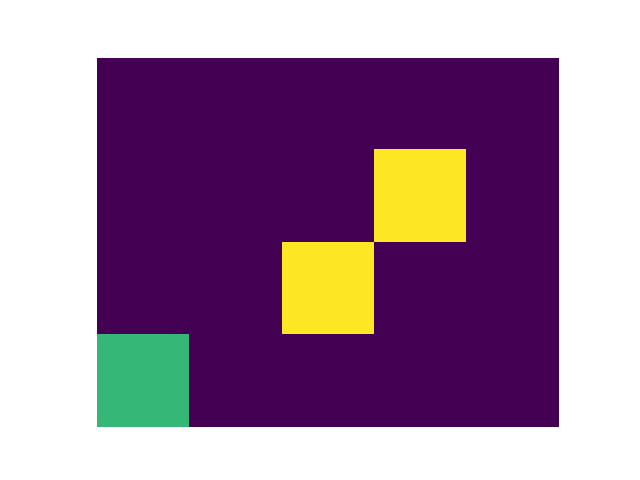

<IPython.core.display.Javascript object>


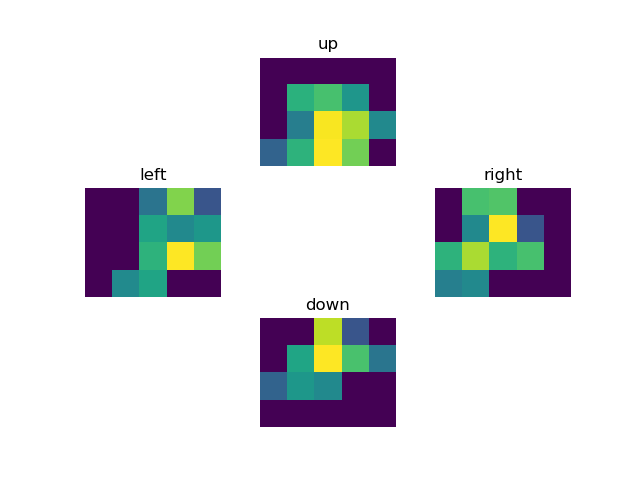

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt

# Determine the size of the field, change this parameters as you like
m_x = 5
m_y = 4

steps = 200

actions = ['up','left','right','down']  # Those are the availabe actions for the QLearning.
field = generate_field(m_x, m_y, num_rewards=5, max_reward=10) # The field that is used for learning.

# Plotting the generated field
figure = plt.figure('Field')
plt.axis('off')
plt.imshow(field, interpolation='none')
figure.canvas.draw()

# Generate a QLearning instance with the right parameters.
### BEGIN SOLUTION
player = QLearning(field, actions, 0.9)
### END SOLUTION

# Now we perform steps many learning iterations on the field with
# the generated QLearning instance.
for i in range(steps):     
    player.update()
    player.plot()

Explain in your own words, how the algorithm works. What is depicted on the resulting plots. How can an action policy be derived from these data?

You are also free to write your complete own implementation of the QLearning algorithm (instead of completing the code above). Use the following cell for your implementation.

In [ ]:
### BEGIN SOLUTION
# Your code goes here:
%matplotlib notebook

import itertools

import matplotlib.pyplot as plt
import numpy as np

maze = np.array([[0, 0, .5, 0, 0, 0, 0, 0, .5], 
                 [0, 0, 0, .2, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, .8, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0]])
actions = [lambda c : (c[0], c[1] + 1),
           lambda c : (c[0], c[1] - 1),
           lambda c : (c[0] - 1, c[1]),
           lambda c : (c[0] + 1, c[1])]

plt.figure('Q Learning')
plt.subplot(121).imshow(maze, interpolation='none', cmap='hot')

def move(pos, direction):
    new_pos = actions[direction](pos)
    for dim, c in enumerate(new_pos):
        if c < 0 or c >= maze.shape[dim]:
            raise ValueError('Action impossible.')
    return new_pos

# (Initialize parameters)
gamma = 0.9

# Initialize q(s, a) <- 0
q = np.zeros((np.prod(maze.shape), len(actions)))

for run in range(100):
    # Observe current state s
    position = (0, 0)
    s = np.ravel_multi_index(position, maze.shape)

    # Repeat
    for iteration in range(100):
        # Select action a
        a = np.random.randint(len(actions))
        # Execute action a (if possible)
        try:
            position = move(position, a)
        except ValueError:
            continue
        # Receive reward r
        r = maze[position]
        # Observe new state s_n
        s_n = np.ravel_multi_index(position, maze.shape)

        # Update q(s, a)
        q[s, a] = r + gamma * np.max(q[s_n, :])

        # Update s
        s = s_n
    plt.subplot(122).imshow(q, interpolation='none', cmap='hot')
    plt.gcf().canvas.draw()
### END SOLUTION